This is for temporary exploration of stuff

In [37]:
import pandas as pd 
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import sys
import numpy as np
sys.path.append('../')

In [5]:
data = pd.read_csv('../data/oresund/2025-01-19_filtered_2.csv')

In [6]:
data.columns

Index(['# Timestamp', 'Type of mobile', 'MMSI', 'Latitude', 'Longitude',
       'Navigational status', 'SOG', 'COG', 'Heading', 'Ship type',
       'Cargo type', 'Width', 'Length', 'Destination'],
      dtype='object')

In [11]:
data['Type of mobile'].unique(), data['Longitude'].head(), data['Latitude'].head()

(array(['Class A', 'Class B'], dtype=object),
 0    12.823242
 1    12.823303
 2    12.823297
 3    12.823233
 4    12.823255
 Name: Longitude, dtype: float64,
 0    55.867080
 1    55.867053
 2    55.867060
 3    55.867087
 4    55.867068
 Name: Latitude, dtype: float64)

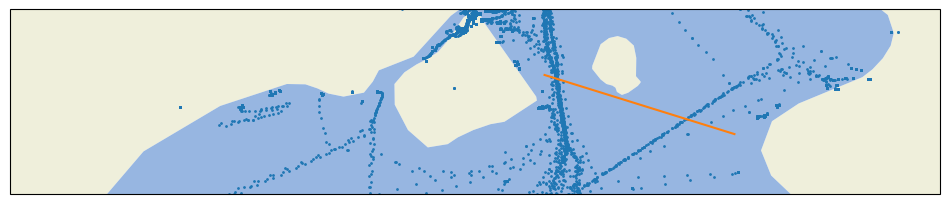

In [31]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 42))
ax.set_ylim(55.5, 55.7)
ax.plot(data['Longitude'], data['Latitude'], 'o', markersize=1, transform=ccrs.PlateCarree())
long= (12.682873, 12.88866)
lat = (55.628996, 55.564952)
ax.plot(long, lat, transform=ccrs.PlateCarree())

#(55.628996, 12.682873) og (55.564952, 12.88866)



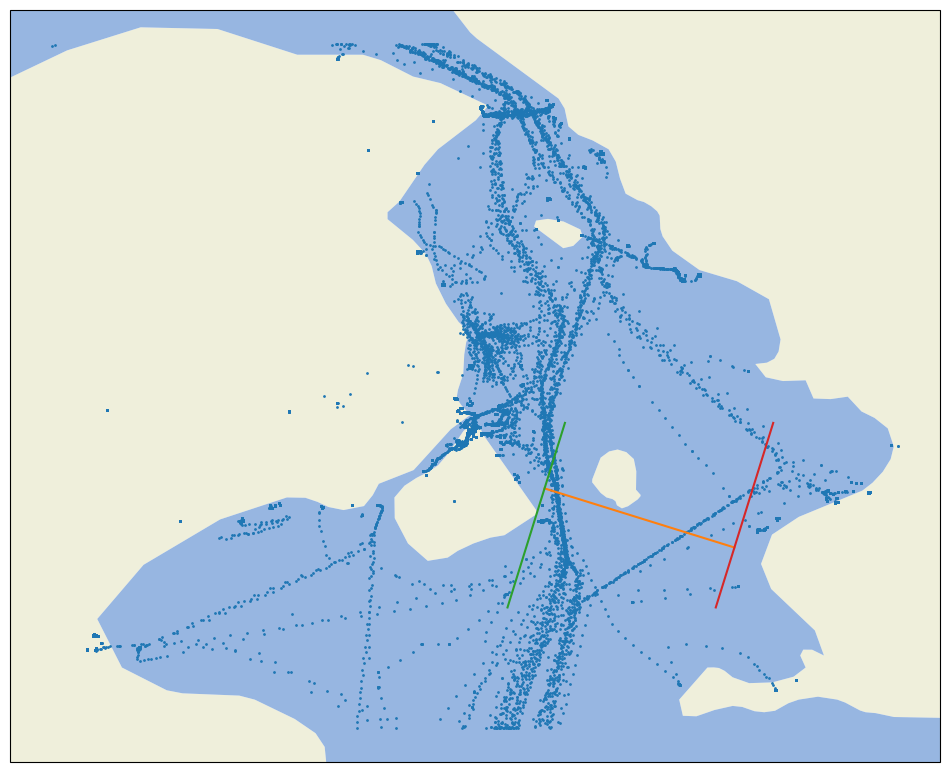

In [43]:
#Using a flat earth approximation
slope_or = (lat[1]-lat[0])/(long[1] - long[0])

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 12))
ax.plot(data['Longitude'], data['Latitude'], 'o', markersize=1, transform=ccrs.PlateCarree())
long= (12.682873, 12.88866)
lat = (55.628996, 55.564952)
ax.plot(long, lat, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

lats = np.linspace(55.5, 55.7, 100)

def f(xdif, offset):
    return -slope_or*xdif + offset

ax.plot(f(lats-lat[0], long[0]), lats, transform=ccrs.PlateCarree())
ax.plot(f(lats-lat[1], long[1]), lats, transform=ccrs.PlateCarree())

In [41]:
print((lats-lat[0])*slope_or)

[ 4.01454894e-02  3.95167722e-02  3.88880551e-02  3.82593379e-02
  3.76306207e-02  3.70019036e-02  3.63731864e-02  3.57444693e-02
  3.51157521e-02  3.44870349e-02  3.38583178e-02  3.32296006e-02
  3.26008835e-02  3.19721663e-02  3.13434491e-02  3.07147320e-02
  3.00860148e-02  2.94572977e-02  2.88285805e-02  2.81998633e-02
  2.75711462e-02  2.69424290e-02  2.63137119e-02  2.56849947e-02
  2.50562775e-02  2.44275604e-02  2.37988432e-02  2.31701261e-02
  2.25414089e-02  2.19126917e-02  2.12839746e-02  2.06552574e-02
  2.00265403e-02  1.93978231e-02  1.87691059e-02  1.81403888e-02
  1.75116716e-02  1.68829545e-02  1.62542373e-02  1.56255201e-02
  1.49968030e-02  1.43680858e-02  1.37393687e-02  1.31106515e-02
  1.24819343e-02  1.18532172e-02  1.12245000e-02  1.05957829e-02
  9.96706571e-03  9.33834855e-03  8.70963139e-03  8.08091423e-03
  7.45219707e-03  6.82347991e-03  6.19476275e-03  5.56604559e-03
  4.93732843e-03  4.30861127e-03  3.67989411e-03  3.05117695e-03
  2.42245979e-03  1.79374